## Decisive Distributions

### Import Dependencies

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [3]:
# Setup Alpaca API environment

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
)



### Read in stock data using Alpaca API

In [6]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2021-06-04', tz='America/New_York').isoformat()
end_date =  pd.Timestamp('2022-06-04', tz='America/New_York').isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
df = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
  
).df

# Display sample data
df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-06-04 04:00:00+00:00,124.01,126.16,123.8500,125.89,75167991,467755,125.367963,AAPL
2021-06-07 04:00:00+00:00,126.20,126.32,124.8321,125.90,71057300,504252,125.369057,AAPL
2021-06-08 04:00:00+00:00,126.60,128.46,126.2101,126.74,74402276,532070,127.074198,AAPL
2021-06-09 04:00:00+00:00,127.25,127.75,126.5200,127.13,56886063,382624,127.073349,AAPL
2021-06-10 04:00:00+00:00,127.00,128.19,125.9400,126.11,71040501,497363,126.661177,AAPL
...,...,...,...,...,...,...,...,...
2021-07-14 04:00:00+00:00,44.04,44.30,43.8150,44.00,7470011,34670,44.009248,WORK
2021-07-15 04:00:00+00:00,43.97,44.81,43.4200,44.57,11543675,75848,44.323082,WORK
2021-07-16 04:00:00+00:00,44.76,44.87,44.6100,44.70,4202927,25148,44.713761,WORK


In [9]:
# Reorganize the DataFrame
# Separate ticker data
AAPL = df[df["symbol"]=="AAPL"].drop("symbol", axis=1)
LUV = df[df["symbol"]=="LUV"].drop("symbol", axis=1)
SPY = df[df["symbol"]=="SPY"].drop("symbol", axis=1)
DIS = df[df["symbol"]=="DIS"].drop("symbol", axis=1)
SBUX = df[df["symbol"]=="SBUX"].drop("symbol", axis=1)
WORK = df[df["symbol"]=="WORK"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
organized_df = pd.concat([AAPL, LUV, SPY, DIS, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])

# Display sample data
organized_df

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2021-06-04 04:00:00+00:00  124.01  126.16  123.8500  125.89   75167991   
2021-06-07 04:00:00+00:00  126.20  126.32  124.8321  125.90   71057300   
2021-06-08 04:00:00+00:00  126.60  128.46  126.2101  126.74   74402276   
2021-06-09 04:00:00+00:00  127.25  127.75  126.5200  127.13   56886063   
2021-06-10 04:00:00+00:00  127.00  128.19  125.9400  126.11   71040501   
...                           ...     ...       ...     ...        ...   
2022-05-27 04:00:00+00:00  145.31  149.68  145.2600  149.64   91113648   
2022-05-31 04:00:00+00:00  149.15  150.66  146.8400  148.84  103425599   
2022-06-01 04:00:00+00:00  149.92  151.74  147.6800  148.71   73871387   
2022-06-02 04:00:00+00:00  147.87  151.27  146.8600  151.21   72348286   
2022-06-03 04:00:00+00:00  146.80  147.97  144.4600  145.38   88571507   

                                                     LUV                  ...  \
                          trade_count        vwap   open     high    low  ...   
timestamp                                                                 ...   
2021-06-04 04:00:00+00:00      467755  125.367963  58.56  58.8499  57.91  ...   
2021-06-07 04:00:00+00:00      504252  125.369057  58.69  58.9200  57.92  ...   
2021-06-08 04:00:00+00:00      532070  127.074198  58.80  59.3000  58.31  ...   
2021-06-09 04:00:00+00:00      382624  127.073349  59.00  59.1700  58.20  ...   
2021-06-10 04:00:00+00:00      497363  126.661177  58.85  59.1400  57.47  ...   
...                               ...         ...    ...      ...    ...  ...   
2022-05-27 04:00:00+00:00      683216  148.197970  45.36  46.1200  45.26  ...   
2022-05-31 04:00:00+00:00      703613  149.099041  44.91  46.2800  44.75  ...   
2022-06-01 04:00:00+00:00      624424  149.374805  46.40  46.4600  43.98  ...   
2022-06-02 04:00:00+00:00      574555  149.521514  44.04  44.5900  43.60  ...   
2022-06-03 04:00:00+00:00      761200  145.812721  43.87  44.1500  43.06  ...   

                               SBUX                           WORK         \
                             volume trade_count        vwap   open   high   
timestamp                                                                   
2021-06-04 04:00:00+00:00   4477187       54674  111.749106  43.99  44.22   
2021-06-07 04:00:00+00:00   4009023       59664  111.387685  44.09  44.42   
2021-06-08 04:00:00+00:00   4669852       66724  111.525289  44.44  44.67   
2021-06-09 04:00:00+00:00   3669725       59279  111.684831  44.17  44.32   
2021-06-10 04:00:00+00:00   3821367       51514  112.029081  44.17  44.49   
...                             ...         ...         ...    ...    ...   
2022-05-27 04:00:00+00:00   8471432       97573   76.116050    NaN    NaN   
2022-05-31 04:00:00+00:00  23302697      150728   78.427437    NaN    NaN   
2022-06-01 04:00:00+00:00   7528077       96232   76.746820    NaN    NaN   
2022-06-02 04:00:00+00:00  10241468      117369   78.364951    NaN    NaN   
2022-06-03 04:00:00+00:00  10415716      111355   79.048016    NaN    NaN   

                                                                           
                             low  close     volume trade_count       vwap  
timestamp                                                                  
2021-06-04 04:00:00+00:00  43.73  44.17  4831353.0     26806.0  44.083721  
2021-06-07 04:00:00+00:00  44.02  44.33  4441367.0     19386.0  44.288898  
2021-06-08 04:00:00+00:00  43.94  44.03  6290240.0     36834.0  44.132340  
2021-06-09 04:00:00+00:00  44.01  44.02  3098141.0     18595.0  44.105711  
2021-06-10 04:00:00+00:00  43.97  44.46  3122753.0     14963.0  44.336622  
...                          ...    ...        ...         ...        ...  
2022-05-27 04:00:00+00:00    NaN    NaN        NaN         NaN        NaN  
2022-05-31 04:00:00

### Create a new DataFrame and store the closing prices of each stock.

In [13]:
# Create and empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    closing_prices_df[ticker] = organized_df[ticker]['close']

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df

,SPY,LUV,DIS,AAPL,SBUX,WORK
2021-06-04,125.89,58.55,422.60,177.18,111.99,44.17
2021-06-07,125.90,58.28,422.19,176.99,111.33,44.33
2021-06-08,126.74,58.90,422.28,176.33,111.52,44.03
2021-06-09,127.13,58.42,421.65,176.04,111.39,44.02
2021-06-10,126.11,57.50,423.61,176.57,112.21,44.46
...,...,...,...,...,...,...
2022-05-27,149.64,45.80,415.26,109.32,76.71,NaN
2022-05-31,148.84,45.86,412.93,110.44,78.50,NaN
2022-06-01,148.71,44.15,409.59,109.19,76.28,NaN
2022-06-02,151.21,44.57,417.34,110.87,79.42,NaN


### Calculate the daily returns for each stock using the `pct_change()` function

In [16]:
# Compute daily returns
daily_change = closing_prices_df.pct_change().dropna()

# Display sample data
daily_change

,SPY,LUV,DIS,AAPL,SBUX,WORK
2021-06-07,0.000079,-0.004611,-0.000970,-0.001072,-0.005893,0.003622
2021-06-08,0.006672,0.010638,0.000213,-0.003729,0.001707,-0.006767
2021-06-09,0.003077,-0.008149,-0.001492,-0.001645,-0.001166,-0.000227
2021-06-10,-0.008023,-0.015748,0.004648,0.003011,0.007362,0.009995
2021-06-11,0.009833,0.001217,0.001652,0.004587,0.003119,0.000450
...,...,...,...,...,...,...
2022-05-27,0.040757,0.017778,0.024549,0.035129,0.029803,0.000000
2022-05-31,-0.005346,0.001310,-0.005611,0.010245,0.023335,0.000000
2022-06-01,-0.000873,-0.037287,-0.008089,-0.011318,-0.028280,0.000000
2022-06-02,0.016811,0.009513,0.018921,0.015386,0.041164,0.000000


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

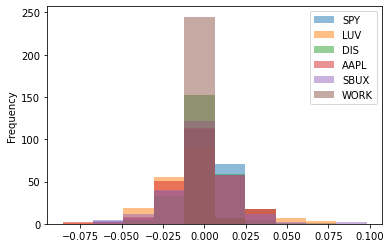

In [17]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
daily_change.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

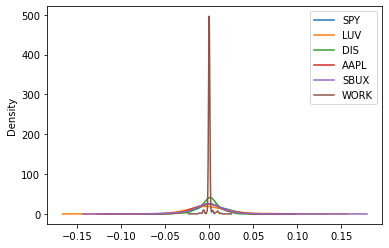

In [18]:
# Visualize the distribution of daily returns across all stocks using a density plot
daily_change.plot.density()